<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Started" data-toc-modified-id="Get-Started-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Started</a></span></li><li><span><a href="#Model-Analysis" data-toc-modified-id="Model-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Analysis</a></span></li><li><span><a href="#Load-the-model(s)-from-the-disk" data-toc-modified-id="Load-the-model(s)-from-the-disk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the model(s) from the disk</a></span><ul class="toc-item"><li><span><a href="#Load-a-list-of-models" data-toc-modified-id="Load-a-list-of-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load a list of models</a></span></li><li><span><a href="#Load-a-single-model" data-toc-modified-id="Load-a-single-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load a single model</a></span></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prediction</a></span><ul class="toc-item"><li><span><a href="#Single-Prediction" data-toc-modified-id="Single-Prediction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Single Prediction</a></span></li><li><span><a href="#Multiple-Predictions" data-toc-modified-id="Multiple-Predictions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Multiple Predictions</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li><li><span><a href="#Adagrad" data-toc-modified-id="Adagrad-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adagrad</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li><li><span><a href="#Adadelta" data-toc-modified-id="Adadelta-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adadelta</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li><li><span><a href="#RMSprop" data-toc-modified-id="RMSprop-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>RMSprop</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li><li><span><a href="#Adam" data-toc-modified-id="Adam-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Adam</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li><li><span><a href="#Adamax" data-toc-modified-id="Adamax-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Adamax</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classifier-report" data-toc-modified-id="Classifier-report-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Classifier report</a></span></li></ul></li></ul></div>

# Get Started

Setup the env and lib.

In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install seaborn
#!pip install directory_structure

In [2]:
!conda list tensorflow-gpu

# packages in environment at /home/hui/anaconda3/envs/tensorflow_gpu:
#
# Name                    Version                   Build  Channel
tensorflow-gpu            2.4.1                h30adc30_0  


In [3]:
!conda list cudatoolkit

# packages in environment at /home/hui/anaconda3/envs/tensorflow_gpu:
#
# Name                    Version                   Build  Channel
cudatoolkit               10.1.243             h6bb024c_0    anaconda


In [4]:
!conda list cudnn

# packages in environment at /home/hui/anaconda3/envs/tensorflow_gpu:
#
# Name                    Version                   Build  Channel
cudnn                     7.6.5.32             hc0a50b0_1    conda-forge


Check the notebook kernel.

In [5]:
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())

import sys
sys.executable

/home/hui/.local/share/jupyter


'/home/hui/anaconda3/envs/tensorflow_gpu/bin/python'

Get the GPU/CPU info

In [6]:
import tensorflow as tf
import tensorflow.keras.backend as K
K.clear_session()
# tf.debugging.set_log_device_placement(True)

print("Here: ")
print(tf.test.is_built_with_cuda())
print()

if tf.test.gpu_device_name():
    print("#############################################################")
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    print("#############################################################")
else:
    print("Please install GPU version of TF")

2022-01-02 12:55:47.373562: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Here: 
True

#############################################################
Default GPU Device: /device:GPU:0
#############################################################


2022-01-02 12:55:48.247800: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-02 12:55:48.248581: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-02 12:55:48.249177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-02 12:55:48.320274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 12:55:48.321613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 na

Get a list of GPU.

In [7]:
print("# GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# GPUs Available:  1


2022-01-02 12:55:52.033869: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-02 12:55:52.034256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 12:55:52.035585: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2022-01-02 12:55:52.035660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-02 12:55:52.035722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-01-02 12:55:52.035769: I tensorflow/stream

Init the cudnn and cuda.

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-01-02 12:55:54.417135: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-02 12:55:54.417276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 12:55:54.417653: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 with Max-Q Design computeCapability: 7.5
coreClock: 1.185GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2022-01-02 12:55:54.417681: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-02 12:55:54.417702: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-01-02 12:55:54.417714: I tensorflow/stream

#########################################################################################################################

# Model Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adagrad, Adadelta, RMSprop, Adam, Adamax

Get the test set from the disk. Let's visually see the structure of the dir.

In [10]:
from directory_structure import Tree

print(Tree("./dataset/test/"))

📂 test
|_📁 cat
|_📁 dog


We load the test set from a given dir and normalize it. At the same time, we assign the batch size as 32 and target size as 64*64.

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    './dataset/test/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 100 images belonging to 2 classes.


# Load the model(s) from the disk

## Load a list of models

Load the models as a list.<br>
<p style="color:#FF0000";>Note, DO NOT perform this unless you have enough RAM in your computer!</p>

In [ ]:
# model_trained = []

# for file in os.scandir("./"):
#     if "h5" in file.name:
#         model_trained.append({
#             "name": file.name[:-2],
#             "model": tf.keras.models.load_model("./saved_models/"+file.name),
#         })

## Load a single model

In [34]:
model_name = "Adamax"
loaded_model_adagrad = tf.keras.models.load_model("./saved_models/"+model_name+".h5")
print("Loaded {} model from disk".format(model_name))

Loaded Adamax model from disk


# Prediction

## Single Prediction

In order to know what binary value of each class is assigned, we can simply use "train_set.class_indices"
<br>
<br>
Now we need to convert ImageDataGenerator to numpy representation.

In [ ]:
# from tensorflow.keras.preprocessing import image

# file_path = ""
# test_img = image.load_img(file_path, target_size=(64,64))
# test_img = image.img_to_array(test_img)
# test_img = np.expand_dims(test_img, axis=0)

# y_pred = loaded_model_adagrad.predict(test_set)

# train_set.class_indices

# if y_pred[0][0] == 1:
#     print("Dog")
# else:
#     print("Cat")

## Multiple Predictions

In [35]:
y_pred = loaded_model_adagrad.predict(test_set)

# the prediction result will be contious val, so we need to apply a method that's similar to sigmoid func
y_pred = np.round_(y_pred)

In [14]:
y_pred.shape

(100, 1)

Convert "flow_from_directory" to numpy format. Ref: https://stackoverflow.com/questions/42284873/assign-imagedatagenerator-result-to-numpy-array

In [15]:
y = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])

In [16]:
y.shape

(100,)

# Metrics

## Confusion Matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [18]:
def plot_confusionM(y_pred, title):
    comf = confusion_matrix(y, y_pred)

    # plot the confusion metrix
    ax = sns.heatmap(comf, annot=True, cmap='Blues')

    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

## Classifier report
Output a detailed report about the classifier.

In [ ]:
# print(classification_report(y, y_pred))

# Adagrad

## Confusion Matrix

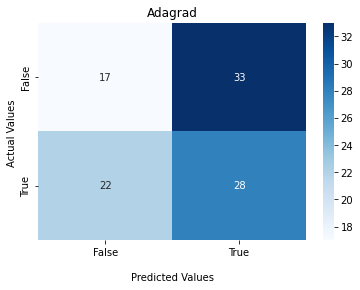

In [19]:
plot_confusionM(y_pred, model_name)

## Classifier report

In [20]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.34      0.38        50
         1.0       0.46      0.56      0.50        50

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.44       100
weighted avg       0.45      0.45      0.44       100



# Adadelta

## Confusion Matrix

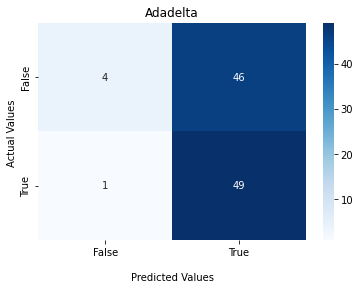

In [23]:
plot_confusionM(y_pred, model_name)

## Classifier report

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.08      0.15        50
         1.0       0.52      0.98      0.68        50

    accuracy                           0.53       100
   macro avg       0.66      0.53      0.41       100
weighted avg       0.66      0.53      0.41       100



# RMSprop

## Confusion Matrix

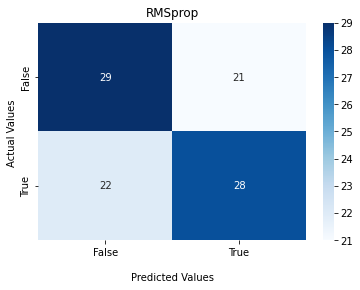

In [27]:
plot_confusionM(y_pred, model_name)

## Classifier report

In [28]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.58      0.57        50
         1.0       0.57      0.56      0.57        50

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100



# Adam

## Confusion Matrix

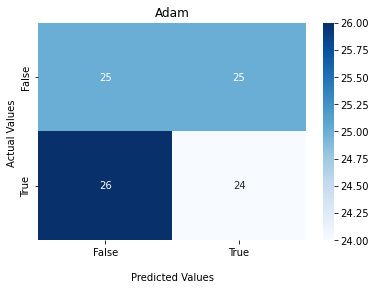

In [32]:
plot_confusionM(y_pred, model_name)

## Classifier report

In [33]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.49      0.50      0.50        50
         1.0       0.49      0.48      0.48        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



# Adamax

## Confusion Matrix

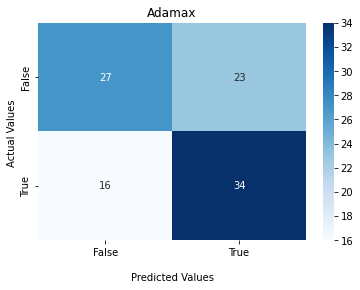

In [37]:
plot_confusionM(y_pred, model_name)

## Classifier report

In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.54      0.58        50
         1.0       0.60      0.68      0.64        50

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100

